### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
import warnings
warnings.filterwarnings('ignore')

### Importing churn Data

In [2]:
df=pd.read_csv('telecom_churn_data.csv')

#### Performing basic sanity checks

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
df.isna().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [6]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Missing value Treatment

In [7]:
# Cheking percent of missing values in columns
missing_data = round((df.isnull().sum()/len(df)),2)
missing_data=pd.DataFrame(missing_data)
missing_data.columns=['Missing %']
missing_data.head()

,Missing %
mobile_number,0.00
circle_id,0.00
loc_og_t2o_mou,0.01
std_og_t2o_mou,0.01
loc_ic_t2o_mou,0.01


Columns with more than 30% of missing value is not relevant for analysis purpose. Dropping for further analysis
without these columns

In [8]:
col_to_drop = missing_data[missing_data['Missing %'] >=0.3].index

In [9]:
col_to_drop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [10]:
df = df.drop(col_to_drop, axis=1)

In [11]:
df.shape

(99999, 186)

In [12]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0

In [13]:
## Deleting remaining irrelevant columns not useful for analysis
irrelevant_columns=['circle_id','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

df.drop(irrelevant_columns,axis=1,inplace=True)

In [14]:
df.shape

(99999, 177)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 177 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(34)
memory usage: 135.0 MB


#### Performing missing value imputation for remaining data

In [16]:
## For the simplicity let's impute 'int' & 'float' with median and 'str' with mode
def missing_imputation(df,column):
    if (df[column].dtypes=='int64') or  (df[column].dtypes=='float64'):
        x=round(df[column].mean(),1)
    else:
        x=df[column].mode()
    df[column]=np.where(df[column].isna(),x,df[column])
    return df

In [17]:
# Cheking percent of missing values in columns
missing_data =df.isnull().sum()
missing_data=pd.DataFrame(missing_data)
missing_data.columns=['Missing']
missing_data.head()

,Missing
mobile_number,0
loc_og_t2o_mou,1018
std_og_t2o_mou,1018
loc_ic_t2o_mou,1018
arpu_6,0


In [18]:
col_with_null = missing_data[missing_data['Missing'] >0].index

In [19]:
for i in col_with_null:
    df=missing_imputation(df,i)

In [20]:
df.isna().sum()

mobile_number         0
loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7    

### Filtering High Value Customers

In [21]:
df['df_70_per']= (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [22]:
perc_70 = df['df_70_per'].quantile(0.7)
perc_70

368.5

In [23]:
df = df[df['df_70_per'] >= perc_70]
df.shape

(30011, 178)

Approximatly ~29.7k records are remaing for high value customers

In [24]:
#### Dropping df_70_per columns
df.drop('df_70_per',axis=1,inplace=True)

#### Mark churn or no churn as per defination

In [25]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [26]:
df.churn.value_counts()

churn
0    27418
1     2593
Name: count, dtype: int64

### Finding out attributes where only one value exists

In [27]:
unique_attribute=df.nunique()
unique_attribute=pd.DataFrame(unique_attribute).reset_index()
unique_attribute.columns=['attributes','unique_values']
unique_attribute[unique_attribute['unique_values']==1]

,attributes,unique_values
1,loc_og_t2o_mou,1
2,std_og_t2o_mou,1
3,loc_ic_t2o_mou,1
56,std_og_t2c_mou_6,1
57,std_og_t2c_mou_7,1
58,std_og_t2c_mou_8,1
59,std_og_t2c_mou_9,1
108,std_ic_t2o_mou_6,1
109,std_ic_t2o_mou_7,1
110,std_ic_t2o_mou_8,1


In [28]:
### dropping columns with unique attributes
unique=unique_attribute[unique_attribute['unique_values']==1]['attributes']
df.drop(unique,axis=1,inplace=True)
df.shape

(30011, 167)

#### For outlier treatment excluding mobile number and churn column

In [30]:
outlier_col=list(df.columns)

In [31]:
outlier_col.pop(0)
outlier_col.pop()

'churn'

In [32]:
outlier_col

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

In [33]:
# clip all outliers in acceptable limits (ie- 5 to 95 %ile)
for col in outlier_col: 
    p0 = df[col].quantile(0) # 5th quantile
    p_95 = df[col].quantile(0.95) # 95th quantile
    df[col].clip(p0, p_95, inplace=True)

In [34]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1261.4215,1258.5555,500.000,57.84,54.68,52.29,130.30,453.43,567.16,325.91,190.30,16.23,33.490,31.640,6.30,23.74,12.59,38.06,8.60,51.39,31.38,40.28,44.60,308.63,447.38,162.28,90.50,33.595,34.085,31.31,3.70,0.0,0.0,0.00,1.2,422.16,533.91,255.79,138.70,4.300,23.29,12.01,82.30,49.89,31.76,49.14,86.30,6.66,7.92,7.18,1.00,60.86,75.14,77.84,169.70,0.0,0.18,0.8,0.7,4.50,0.00,6.50,4.40,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.30,217.56,221.49,121.19,106.20,72.61,76.045,39.53,12.20,427.88,355.23,188.04,164.60,36.890,11.83,30.39,9.40,91.44,126.99,121.875,19.600,12.24,12.31,10.98,2.2,180.54,173.08,191.955,31.20,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.2,2.060,14.530,31.590,8.10,3.63,4.83,3.93,1.00,5,5,7,3,1480,790,1494,0,500,500,455,0,0,0,252,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.380,18.74,0.0,1
8,7001524846,378.721,492.2230,137.3620,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.000,0.000,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.560,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.0,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.000,0.00,0.00,81.43,23.83,15.79,21.38,0.000,0.58,0.10,0.00,22.43,4.08,0.650,13.530,0.00,0.00,0.00,0.0,22.43,4.66,0.750,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,18

#### For fair testing and training remove all columns with '_9' in it

In [35]:
sept_col=[i for i in df.columns.to_list() if '_9' in i]
print(sept_col)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [36]:
# Deleting the churn month columns
df = df.drop(sept_col, axis=1)

In [37]:
df.shape

(30011, 127)

In [38]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1261.4215,1258.5555,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.490,31.640,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.595,34.085,31.31,0.0,0.0,0.00,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.0,0.18,0.8,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.045,39.53,427.88,355.23,188.04,36.890,11.83,30.39,91.44,126.99,121.875,12.24,12.31,10.98,180.54,173.08,191.955,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.530,31.590,3.63,4.83,3.93,5,5,7,1480,790,1494,500,500,455,0,0,252,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.380,18.74,0.0,1
8,7001524846,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.000,0.000,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000,0.000,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.000,0.00,81.43,23.83,15.79,0.000,0.58,0.10,22.43,4.08,0.650,0.00,0.00,0.00,22.43,4.66,0.750,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,845.315,122.16,0.0,0
13,7002191713,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.28,482.46,23.53,63.335,62.795,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.540,0.000,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.410,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.8,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.000,7.49,215.58,26.11,255.26,64.945,38.29,61.56,126.66,29.79,121.875,0.00,0.00,1.91,200.64,68.09,191.955,932.84,172.58,926.56,0.43,0.0,0.0,46.445,51.985,46.485,3.63,4.83,3.93,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.000,0.00,0.0,0
16,7000875565,430.975,299.8690,187.8940,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.830,0.000,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00

#### Columns vbc_3g doesn't have month prefixes in order changing the names as per convention

In [39]:
df = df.rename(columns={'aug_vbc_3g': 'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7','jun_vbc_3g': 'vbc_3g_6', 'sep_vbc_3g': 'vbc_3g_9'})

In [40]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,churn
7,7000701601,1069.180,1261.4215,1258.5555,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.490,31.640,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.595,34.085,31.31,0.0,0.0,0.00,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.0,0.18,0.8,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.045,39.53,427.88,355.23,188.04,36.890,11.83,30.39,91.44,126.99,121.875,12.24,12.31,10.98,180.54,173.08,191.955,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.530,31.590,3.63,4.83,3.93,5,5,7,1480,790,1494,500,500,455,0,0,252,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.380,18.74,0.0,1
8,7001524846,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.000,0.000,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000,0.000,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.000,0.00,81.43,23.83,15.79,0.000,0.58,0.10,22.43,4.08,0.650,0.00,0.00,0.00,22.43,4.66,0.750,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,845.315,122.16,0.0,0
13,7002191713,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.28,482.46,23.53,63.335,62.795,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.540,0.000,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.410,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.8,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.000,7.49,215.58,26.11,255.26,64.945,38.29,61.56,126.66,29.79,121.875,0.00,0.00,1.91,200.64,68.09,191.955,932.84,172.58,926.56,0.43,0.0,0.0,46.445,51.985,46.485,3.63,4.83,3.93,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.000,0.00,0.0,0
16,7000875565,430.975,299.8690,187.8940,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.830,0.000,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.000,4.480,

In [41]:
#### Droping _9 column
df.drop('vbc_3g_9',axis=1,inplace=True)

In [42]:
df.shape

(30011, 126)

#### Creating a function to inject a variable which will tell us if the perticular parameter has improved or degraded in compare to good month

- good_month= {june}

- avg = (july+aug)/2

- diff = avg - good_month 

- if diff > avg then increase (1) else 0 

In [43]:
### derrive new features (getting all mou,recharge and arpu)
relevant_col=['total_og_mou','total_ic_mou','total_rech_num','total_rech_amt','arpu']

In [44]:
for i in relevant_col:
    jun=i+str('_6')
    jul=i+str('_7')
    aug=i+str('_8')
    df['total_'+i]=df[jun]
    df['avg_'+i]=(df[jul]+df[aug])/2
    df['diff_'+i]=df['avg_'+i]-df['total_'+i]
    df[i+str('_dec')]=np.where(df['diff_'+i]<0,1,0)
    #df.drop(['total','avg','diff'],axis=1,inplace=True)
    

In [45]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,total_total_og_mou,avg_total_og_mou,diff_total_og_mou,total_og_mou_dec,total_total_ic_mou,avg_total_ic_mou,diff_total_ic_mou,total_ic_mou_dec,total_total_rech_num,avg_total_rech_num,diff_total_rech_num,total_rech_num_dec,total_total_rech_amt,avg_total_rech_amt,diff_total_rech_amt,total_rech_amt_dec,total_arpu,avg_arpu,diff_arpu,arpu_dec
7,7000701601,1069.180,1261.4215,1258.5555,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.490,31.640,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.595,34.085,31.31,0.0,0.0,0.00,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.0,0.18,0.8,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.045,39.53,427.88,355.23,188.04,36.890,11.83,30.39,91.44,126.99,121.875,12.24,12.31,10.98,180.54,173.08,191.955,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.530,31.590,3.63,4.83,3.93,5,5,7,1480,790,1494,500,500,455,0,0,252,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.380,18.74,1,487.53,479.700,-7.830,1,626.46,493.390,-133.070,1,5,6.0,1.0,0,1480,1142.0,-338.0,1,1069.180,1259.9885,190.8085,0
8,7001524846,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.000,0.000,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000,0.000,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.000,0.00,81.43,23.83,15.79,0.000,0.58,0.10,22.43,4.08,0.650,0.00,0.00,0.00,22.43,4.66,0.750,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,845.315,122.16,0,508.36,301.610,-206.750,1,103.86,22.515,-81.345,1,19,17.5,-1.5,1,437,360.5,-76.5,1,378.721,314.7925,-63.9285,1
13,7002191713,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.28,482.46,23.53,63.335,62.795,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.540,0.000,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.410,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.8,0.00

# EDA

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### outgoing MOU analysis

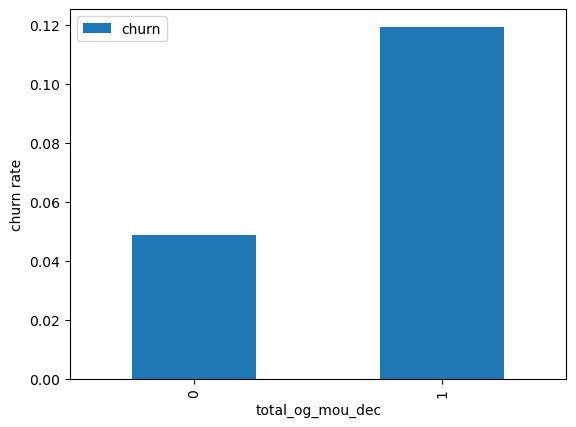

In [47]:
df.pivot_table(values='churn', index='total_og_mou_dec', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

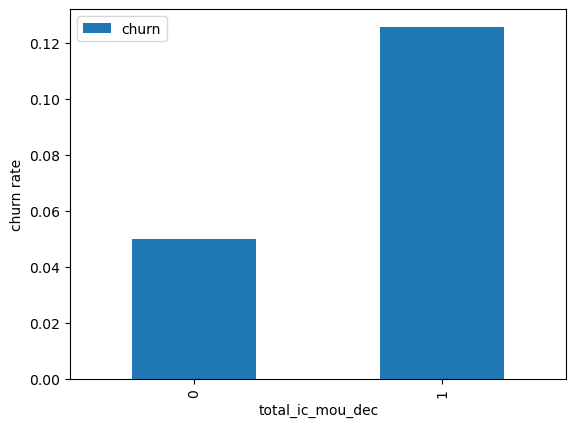

In [48]:
df.pivot_table(values='churn', index='total_ic_mou_dec', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

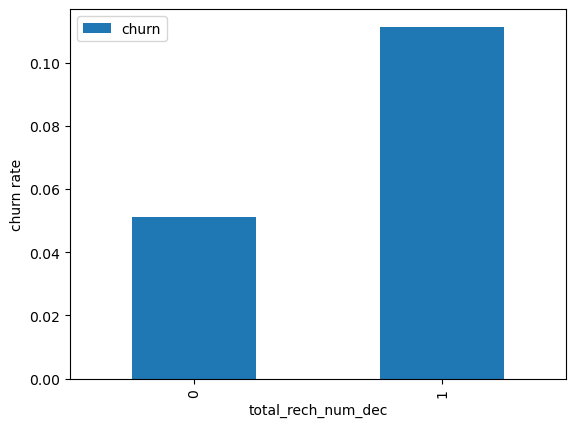

In [49]:
df.pivot_table(values='churn', index='total_rech_num_dec', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

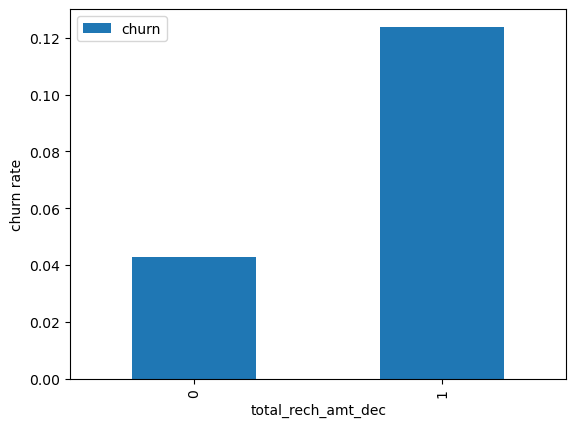

In [50]:
df.pivot_table(values='churn', index='total_rech_amt_dec', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

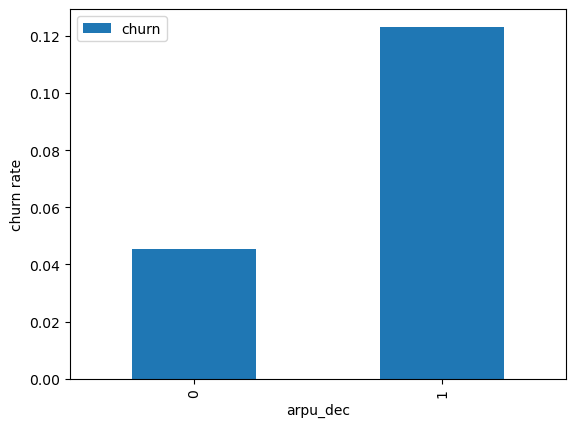

In [51]:
df.pivot_table(values='churn', index='arpu_dec', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Basis all above bar chart, when we observe decrease in outgoing/incoming mou,avg recharge amount,number of recharge and avg RPU,
customers are more likely to churn

##### Analysis of recharge amount and number of recharge in action month

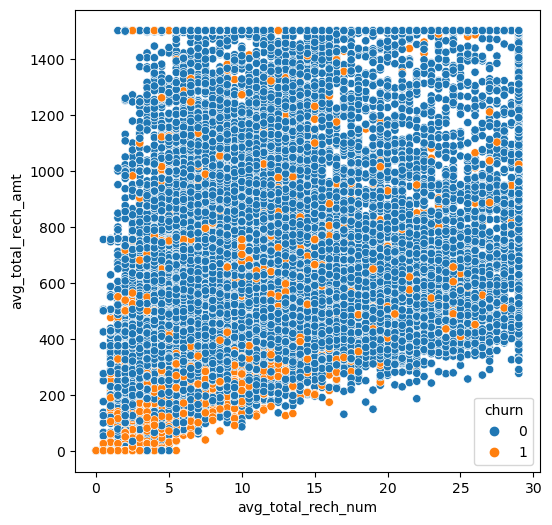

In [52]:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x='avg_total_rech_num',y='avg_total_rech_amt', hue='churn',data=df)

#### Above graph shows people who are doing less number of recharges are more prone to churn

### Dropping additional columns added for analysis

In [53]:
df.drop(['total_total_og_mou','avg_total_og_mou','diff_total_og_mou',
              'total_total_ic_mou','avg_total_ic_mou','diff_total_ic_mou',
             'total_total_rech_num','avg_total_rech_num','diff_total_rech_num',
             'total_total_rech_amt','avg_total_rech_amt','diff_total_rech_amt',
             'total_arpu','avg_arpu','diff_arpu'], axis=1,inplace=True)

In [54]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn,total_og_mou_dec,total_ic_mou_dec,total_rech_num_dec,total_rech_amt_dec,arpu_dec
7,7000701601,1069.180,1261.4215,1258.5555,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.490,31.640,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.595,34.085,31.31,0.0,0.0,0.00,422.16,533.91,255.79,4.300,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.0,0.18,0.8,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.045,39.53,427.88,355.23,188.04,36.890,11.83,30.39,91.44,126.99,121.875,12.24,12.31,10.98,180.54,173.08,191.955,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.530,31.590,3.63,4.83,3.93,5,5,7,1480,790,1494,500,500,455,0,0,252,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.380,18.74,1,1,1,0,1,0
8,7001524846,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.000,0.000,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000,0.000,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.560,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.000,0.00,81.43,23.83,15.79,0.000,0.58,0.10,22.43,4.08,0.650,0.00,0.00,0.00,22.43,4.66,0.750,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.000,0.000,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,845.315,122.16,0,1,1,1,1,1
13,7002191713,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.28,482.46,23.53,63.335,62.795,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.540,0.000,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.410,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,0.8,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.000,7.49,215.58,26.11,255.26,64.945,38.29,61.56,126.66,29.79,121.875,0.00,0.00,1.91,200.64,68.09,191.955,932.84,172.58,926.56,0.43,0.0,0.0,46.445,51.985,46.485,3.63,4.83,3.93,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.000,0.00,0,1,1,0,1,1
16,7000875565,430.975,299.8690,187.8940,50.51,74.01,70.61,296.29,229.74,1

In [55]:
df.shape

(30011, 131)

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop(['mobile_number','churn'], axis=1)
y = df['churn']

In [58]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

#### Handling class imbalance data

In [59]:
X_train.shape

(21007, 129)

In [60]:
y_train.sum()/len(y_train)*100

8.66377874041986

In [61]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [62]:
X_train.shape

(38374, 129)

In [63]:
y_train.sum()/len(y_train)*100

50.0

we have increase churn from 8.6% to 50% using smote to tackle class imbalance

#### Standard Scaling

In [64]:
# Standardization method
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of the numeric columns
cols_scale = X_train.columns.to_list()

In [65]:
cols_scale

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [66]:
# Removing all derrived_col
cols_scale.remove('total_og_mou_dec')
cols_scale.remove('total_ic_mou_dec')
cols_scale.remove('total_rech_num_dec')
cols_scale.remove('total_rech_amt_dec')
cols_scale.remove('arpu_dec')

In [67]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_og_mou_dec,total_ic_mou_dec,total_rech_num_dec,total_rech_amt_dec,arpu_dec
0,-0.251771,-0.529523,-0.311695,-0.708106,-0.655993,-0.569365,-0.262386,-0.523542,-0.706003,-0.419395,-0.455577,-0.5386,-0.440643,-0.495569,-0.548733,-0.084523,-0.046084,-0.144377,0.929167,0.278797,-0.459463,3.621572,1.776725,2.376243,-0.467486,-0.484501,-0.481234,0.647010,0.178268,-0.316488,-0.656155,-0.621166,-0.517867,-0.721340,-0.673786,-0.581001,0.860192,2.409983,2.772859,-0.894121,-0.831383,-0.659883,-0.356524,-0.363082,-0.511401,-0.651522,-0.678161,-0.630118,-0.513008,0.0,0.0,-0.599423,-0.714361,-0.605844,-0.503272,-0.080116,-0.541095,1.301890,0.590110,-0.138609,-0.157306,-0.458157,0.148782,0.662497,0.275910,-0.279453,-0.639262,-0.617312,-0.568425,-0.707501,-0.691441,-0.648375,1.717259,0.181773,0.802391,-0.659981,-0.717183,-0.616780,0.345733,0.027145,-0.228749,-0.518011,-0.250721,-0.219604,-0.413731,-0.407930,0.550400,-0.437746,-0.398643,-0.479364,-0.853773,-0.828665,-0.506412,-0.780368,-0.211285,-0.227257,0.446034,0.473491,0.789703,0.373088,0.699370,1.000845,3.890785,4.050339,-0.309618,-0.394822,1.050467,3.535648,3.870724,3.775180,4.095604,-0.361007,-0.35151,-0.330951,-0.305921,-0.302599,-0.273737,-0.203294,-0.203988,-0.181514,0.417318,0.206018,-0.072086,-0.375615,1,1,1,0,1
1,-0.670529,-0.667407,0.106188,-0.598200,-0.172926,-0.147991,0.260108,-0.222495,0.555002,-0.419395,-0.455577,-0.5386,-0.440643,-0.495569,-0.548733,-0.239214,-0.253278,-0.281203,-0.644107,-0.616675,-0.349355,-0.500307,-0.494175,-0.503304,-0.467486,-0.484501,-0.204466,-0.578284,-0.562690,-0.384034,-0.493241,-0.025676,0.022764,0.825678,0.212987,1.073926,-0.333880,-0.337144,-0.377820,0.105840,0.042368,0.550003,3.228178,-0.363082,2.236113,-0.651522,-0.678161,1.437835,-0.513008,0.0,0.0,-0.194228,-0.226700,0.358120,0.962553,-0.235693,-0.077912,0.238611,0.244061,1.184673,-0.536600,-0.484631,-0.570441,0.358035,-0.001289,0.681670,-0.394838,-0.432047,-0.534241,-0.524702,-0.292874,-0.501918,-0.391672,-0.389745,-0.440503,-0.575342,-0.433050,-0.577922,0.198403,-0.045598,0.878920,3.188028,-0.250721,5.061021,1.407503,1.462847,4.386550,-0.157243,0.141095,0.791473,-0.574717,0.003114,0.678738,-0.728839,-0.419006,-0.147615,-0.368886,-0.147089,0.1600

In [68]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_og_mou_dec,total_ic_mou_dec,total_rech_num_dec,total_rech_amt_dec,arpu_dec
39713,-0.906306,0.032519,1.955569,-0.385290,-0.027592,0.095332,-0.769998,-0.757176,-0.344702,1.266260,-0.455577,-0.538600,-0.082582,-0.495569,-0.548733,-0.538445,-0.196782,-0.398944,-0.597766,-0.529989,-0.166107,-0.330682,-0.018567,-0.503304,1.359748,0.988944,3.212191,-0.645824,-0.469598,-0.303736,-0.178842,0.122262,0.347126,-0.502249,-0.491296,-0.188070,-0.098595,1.278813,-0.37782,-0.478804,-0.279637,0.045264,-0.356524,-0.363082,-0.511401,0.531676,3.056076,3.696126,2.865100,0.0,0.0,-0.741499,-0.424339,0.020033,0.624482,1.088921,0.031910,0.042079,0.252928,0.189945,-0.452985,-0.033392,-0.559365,0.131012,0.434094,0.049620,-0.373610,-0.021862,1.895785,-0.305664,-0.364105,-0.648375,-0.166118,1.134304,-0.440503,-0.414919,-0.257787,0.112414,-0.041578,0.252114,0.121621,0.171485,-0.250721,-0.219604,-0.413731,-0.40793,-0.441483,0.062281,-0.398643,-0.479364,0.820562,2.637082,3.049036,-0.952133,0.149492,1.811079,-0.924513,-0.329612,-0.580680,-1.153602,-0.730991,-0.422084,0.369812,0.136271,0.416103,0.593766,3.653955,4.041987,-0.25835,-0.264888,-0.244164,1.066283,1.899069,4.367067,-0.305921,-0.302599,-0.273737,4.918976,-0.203988,-0.181514,-0.563187,3.045443,3.889570,-0.375615,0,0,0,0,0
80955,2.254452,0.869191,-1.117706,2.444626,2.758078,-0.548091,-0.268578,-0.761653,-0.926408,-0.419395,-0.044709,-0.538600,-0.440643,0.972298,1.056604,-0.269174,-0.426927,-0.670352,-0.221777,-0.698583,-0.784029,-0.281100,-0.494175,-0.503304,-0.467486,-0.268178,-0.481234,-0.302914,-0.677299,-0.802734,2.492449,2.785338,-0.517867,-0.029339,-0.406807,-0.581001,-0.333880,-0.337144,-0.37782,2.128269,2.393038,-0.671119,-0.356524,-0.363082,-0.511401,-0.490242,-0.247750,-0.630118,3.277064,0.0,0.0,2.176305,2.174777,-0.818775,-0.673757,-0.742511,-0.768255,-0.715952,-0.869731,-0.859599,-0.255462,-0.001034,-0.570441,-0.753510,-0.845042,-0.886027,3.299726,-0.370705,-0.568425,0.364279,-0.383855,-0.648375,-0.391672,-0.389745,-0.440503,2.544969,-0.470784,-0.682983,-0.163764,-0.842526,-0.759550,-0.518011,-0.250721,-0.219604,-0.413731,-0.40793,-0.441483,-0.437746,-0.398643,-0.479364,2.355368,0.557634,-0.654555,2.259875,0.668793,-1.043587,-0.368886,-0.329612,

### Performing Principle Component Analysis (PCA)

In [69]:
#Import PCA
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_train)
pca.components_

array([[ 4.15347123e-02,  7.61294704e-02,  1.21252293e-01, ...,
        -6.43576068e-03, -2.22487939e-02, -2.16422875e-02],
       [ 9.19010103e-02,  1.65243043e-01,  1.36995748e-01, ...,
        -1.43326196e-02, -2.01571748e-02, -2.05287403e-02],
       [-2.70921596e-02,  1.18009160e-01,  1.71040407e-01, ...,
        -5.19500138e-02, -6.31700537e-02, -6.39288477e-02],
       ...,
       [ 4.39896720e-03, -9.93550571e-03, -4.56744138e-03, ...,
        -2.25608292e-03, -5.41220593e-03, -3.57715284e-03],
       [-0.00000000e+00, -5.99766000e-16,  7.81351407e-16, ...,
        -1.44878794e-16,  6.89115358e-16,  2.74676483e-16],
       [-0.00000000e+00,  2.58953184e-17, -2.31422400e-17, ...,
        -2.21361070e-18,  6.48068386e-17, -1.16801176e-16]])

In [70]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.14298091 0.23053742 0.29007089 0.33821164 0.37692613 0.41536537
 0.45251888 0.48313436 0.50760841 0.53031396 0.55232418 0.5724951
 0.59050424 0.60816601 0.62351103 0.63777849 0.65149469 0.66411001
 0.67661824 0.68849191 0.69891303 0.70882108 0.71867298 0.72756573
 0.73632299 0.74469535 0.75283275 0.76075568 0.76861026 0.77597974
 0.78317266 0.79032744 0.79728459 0.80370568 0.81004273 0.81619668
 0.82231898 0.82820097 0.83403242 0.83974731 0.84528423 0.8505732
 0.85563261 0.86053405 0.86533428 0.87001798 0.87459256 0.87899623
 0.8833634  0.887596   0.89163171 0.89560878 0.89948675 0.9032649
 0.90694979 0.91058383 0.91410049 0.91748164 0.92073256 0.92380638
 0.92684555 0.92981349 0.93256867 0.93531968 0.93805863 0.94070309
 0.94326553 0.94574738 0.94816896 0.95057395 0.95291884 0.95521108
 0.95739982 0.95950113 0.9615223  0.96352584 0.96548046 0.96739811
 0.9692145  0.97100477 0.97276438 0.97443767 0.9760208  0.9775176
 0.97892904 0.98032405 0.98167035 0.98291742 0.98409649 0.98518433

Text(0, 0.5, 'Cumulative Variance')

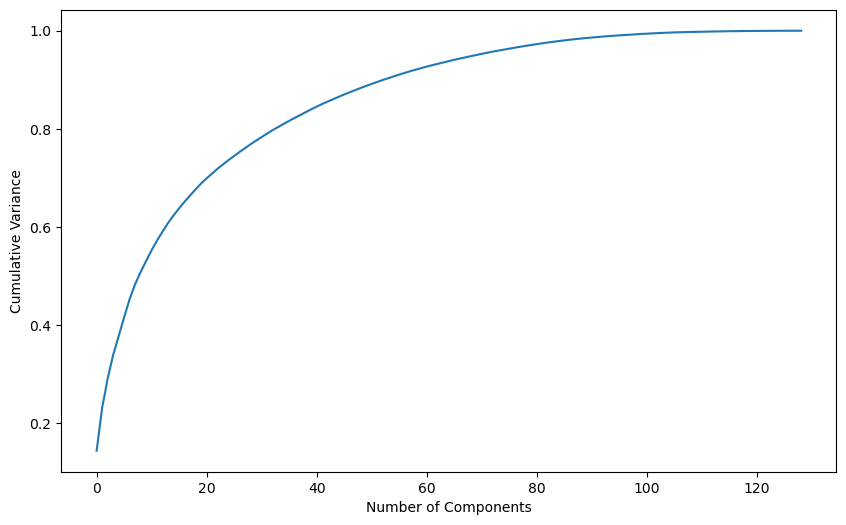

In [71]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

Their are approx 60 components explaning more than 90% of information

Performing PCA with n=60

In [72]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

pca_final = IncrementalPCA(n_components=60)
X_train_pca = pca_final.fit_transform(X_train)

In [73]:
X_test_pca = pca_final.transform(X_test)

#### Testing Model Performance with PCA using regression

In [74]:
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Performing Grid search for logistic regression

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [76]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.121734,0.024625,0.002642,0.001320,0.01,{'C': 0.01},0.858849,0.872793,0.862340,0.878119,0.870413,0.868503,0.007010,6,0.872681,0.869253,0.870363,0.869744,0.868280,0.870064,0.001475
1,0.114785,0.006478,0.002554,0.001216,0.1,{'C': 0.1},0.859114,0.873832,0.862078,0.878638,0.870670,0.868866,0.007274,5,0.872941,0.869319,0.871079,0.869418,0.868607,0.870273,0.001561
2,0.120318,0.018789,0.002578,0.001124,1,{'C': 1},0.859379,0.873832,0.862340,0.878638,0.870157,0.868869,0.007133,1,0.872746,0.869384,0.871339,0.869548,0.868607,0.870325,0.001505
3,0.106196,0.002844,0.002532,0.001201,10,{'C': 10},0.859379,0.873832,0.862340,0.878638,0.870157,0.868869,0.007133,1,0.872746,0.869384,0.871339,0.869548,0.868607,0.870325,0.001505
4,0.105052,0.005514,0.003892,0.001287,100,{'C': 100},0.859379,0.873832,0.862340,0.878638,0.870157,0.868869,0.007133,1,0.872746,0.869384,0.871339,0.869483,0.868607,0.870312,0.001512
5,0.106427,0.002533,0.002205,0.000581,1000,{'C': 1000},0.859379,0.873832,0.862340,0.878638,0.870157,0.868869,0.007133,1,0.872746,0.869384,0.871339,0.869483,0.868607,0.870312,0.001512


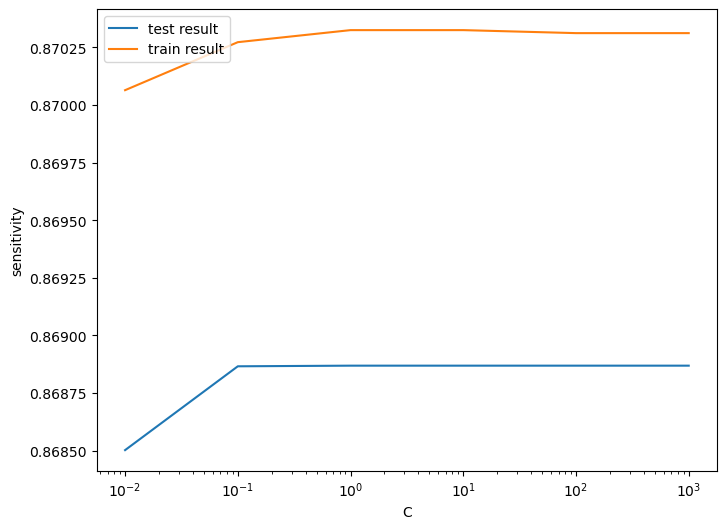

In [78]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [79]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("Highest test sensitivity is {} at C = {}".format(round(best_score*100,2), best_C))

Highest test sensitivity is 86.89 at C = 1


##### Fitting with best param

In [80]:
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Prediction on Train Set

In [81]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [82]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16348  2839]
 [ 2494 16693]]


In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8610256944806379
Sensitivity:- 0.870016156772815
Specificity:- 0.8520352321884609


#### Prediction on Test Set

In [85]:
y_test_pred = log_pca_model.predict(X_test_pca)

In [86]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7001 1230]
 [ 156  617]]


In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8460684140382052
Sensitivity:- 0.7981888745148771
Specificity:- 0.8505649374316608


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.87
    - Specificity = 0.85
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.80
    - Specificity = 0.85
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

#### Testing model performance with PCA using Decision tree

In [89]:
# Importinf DT classifier
from sklearn.tree import DecisionTreeClassifier

#### Performing grid search for Decision Tree

In [90]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [91]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.763458,0.028099,0.002457,0.000120,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.768048,0.792286,0.816311,0.775404,0.804274,0.791264,0.017822,5
1,0.746662,0.002828,0.002432,0.000098,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.768048,0.792286,0.816311,0.775404,0.804274,0.791264,0.017822,5
2,0.745318,0.001577,0.002443,0.000064,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.764399,0.787855,0.815789,0.770453,0.799062,0.787512,0.018753,7
3,0.746947,0.004642,0.002403,0.000089,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.764399,0.787855,0.815789,0.770453,0.799062,0.787512,0.018753,7
4,1.236131,0.014776,0.002622,0.000065,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.809747,0.855616,0.865816,0.837936,0.848058,0.843435,0.019161,1
5,1.236736,0.014940,0.002627,0.000095,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.809747,0.855616,0.865816,0.837936,0.848058,0.843435,0.019161,1
6,1.172886,0.021613,0.002687,0.000062,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.810268,0.847537,0.846535,0.835591,0.841803,0.836347,0.013707,3
7,1.168659,0.023728,0.002649,0.000072,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.810268,0.847537,0.846535,0.835591,0.841803,0.836347,0.013707,3


In [92]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8434347796740086
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Fitting with best param

In [90]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [91]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[16472  2715]
 [ 2392 16795]]
Accuracy:- 0.8669150987647887
Sensitivity:- 0.8753322562151457
Specificity:- 0.8584979413144317


##### Prediction on the test set

In [92]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[6849 1382]
 [ 256  517]]
Accuracy:- 0.8180808529542426
Sensitivity:- 0.6688227684346701
Specificity:- 0.8320981654719961


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.87
    - Specificity = 0.85
- Test set
    - Accuracy = 0.81
    - Sensitivity = 0.66
    - Specificity = 0.83
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set.
Using DT would not be a good idea

#### Testing model performance with Random using Decision tree

In [93]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [200,300], 
    'max_features': [10,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


In [95]:
### Skipping hypertuning as it was resource intesive
rf_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [96]:
# Predictions on the train set
y_train_pred = rf_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[15985  3202]
 [ 3117 16070]]
Accuracy:- 0.835331213842706
Sensitivity:- 0.8375462552770104
Specificity:- 0.8331161724084015


##### Prediction on the test set

In [97]:
# Prediction on the test set
y_test_pred = rf_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[6873 1358]
 [ 215  558]]
Accuracy:- 0.8252998667258996
Sensitivity:- 0.7218628719275549
Specificity:- 0.8350139715708905


***Model summary***

- Train set
    - Accuracy = 0.83
    - Sensitivity = 0.83
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.73
    - Specificity = 0.83
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.


#### Conclusion

After Performing PCA on various models we can comfortably say that, PCA with logistiic regression is preforming best with 80% sensitivity and 85% of accuracy on test set

#### Building Model without PCA to identify top contributors

In [98]:
##### Importing Logistince regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Performing RFE to reduce number of variables

In [99]:
# Importing RFE
from sklearn.feature_selection import RFE

rfe = RFE(logreg)
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [100]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_7', 'total_ic_mou_6',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'max_rech_amt_6', 'last_day_rch_amt_6', 'last_day_rch_amt_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',


#### Further procession RFE to reduce variables

In [101]:
rfe = RFE(logreg)
# Fit the rfe model with train set
rfe = rfe.fit(X_train[rfe_cols], y_train)

In [102]:
# RFE selected columns
rfe_cols_1 = X_train[rfe_cols].columns[rfe.support_]
print(rfe_cols_1)

Index(['roam_og_mou_8', 'loc_og_t2m_mou_6', 'loc_og_mou_6', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_3g_mb_6',
       'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_6', 'monthly_3g_6',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_8', 'total_ic_mou_dec',
       'total_rech_num_dec', 'arpu_dec'],
      dtype='object')


### Fitting 1st Model

In [104]:
import statsmodels.api as sm

X_train_sm_1 = sm.add_constant(X_train[rfe_cols_1])

#Instantiate the model
norm_log1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
norm_log1 = norm_log1.fit()

norm_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38341
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12131.
Date:                Mon, 02 Oct 2023   Deviance:                       24261.
Time:                        02:29:20   Pearson chi2:                 3.94e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5295
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8876      0.044     20.091      0.000       0.801       0.974
roam_og_mou_8          0.5475      0.017     33.145      0.000       0.515       0.580
loc_og_t2m_mou_6      -0.4401      0.047     -9.438      0.000      -0.531      -0.349
loc_og_mou_6           0.4005      0.072      5.565      0.000       0.259       0.542
std_og_mou_6           0.6079      0.101      6.008      0.000       0.410       0.806
std_og_mou_7          -0.3778      0.081     -4.656      0.000      -0.537      -0.219
std_og_mou_8           0.8385      0.078     10.801      0.000       0.686       0.991
isd_og_mou_8           0.5975      0.025     24.246      0.000       0.549       0.646
total_og_mou_6        -0.3957      0.102     -3.888      0.000      -0.595      -0.196
total_og_mou_7         0.7629      0.075     10.148      0.000       0.616       0.910
total_og_mou_8        -1.4974      0.088    -16.948      0.000      -1.671      -1.324
loc_ic_t2t_mou_6       0.2386      0.043      5.549      0.000       0.154       0.323
loc_ic_t2m_mou_6       0.6932      0.083      8.399      0.000       0.531       0.855
loc_ic_t2m_mou_8      -0.3450      0.068     -5.038      0.000      -0.479      -0.211
loc_ic_mou_6          -0.6577      0.114     -5.789      0.000      -0.880      -0.435
loc_ic_mou_8           0.4084      0.088      4.627      0.000       0.235       0.581
total_ic_mou_6         0.5984      0.057     10.537      0.000       0.487       0.710
total_ic_mou_8        -1.3651      0.068    -20.084      0.000      -1.498      -1.232
total_rech_num_6       0.5456      0.028     19.566      0.000       0.491       0.600
total_rech_num_8      -0.9053      0.029    -30.787      0.000      -0.963      -0.848
last_day_rch_amt_8    -0.6425      0.021    -30.622      0.000      -0.684      -0.601
vol_2g_mb_6            0.5142      0.026     20.019      0.000       0.464       0.565
vol_3g_mb_6            0.7596      0.035     21.596      0.000       0.691       0.828
monthly_2g_6          -0.7682      0.033    -23.383      0.000      -0.833      -0.704
monthly_2g_8          -0.7587      0.050    -15.236      0.000      -0.856      -0.661
sachet_2g_6           -0.4584      0.023    -20.030      0.000      -0.503      -0.414
monthly_3g_6          -0.6194      0.034    -18.187      0.000      -0.686      -0.553
monthly_3g_8          -0.5394      0.030    -17.927      0.000      -0.598      -0.480
sachet_3g_6           -0.3553      0.026    -13.798      0.000      -0.406      -0.305
sachet_3g_8           -0.4082      0.034    -11.929      0.000      -0.475      -0.341
total_ic_mou_dec      -0.8327      0.042    -19.843      0.000      -0.915      -0.750
total_rech_num_dec    -0.7844      0.045    -17.394      0.000      -0.873      -0.696
arpu_dec              -0.4610      0.0

#### Checking VIFs

In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols_1].values, i) for i in range(X_train[rfe_cols_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,loc_ic_mou_6,30.65
7,total_og_mou_6,27.07
3,std_og_mou_6,26.92
14,loc_ic_mou_8,17.81
4,std_og_mou_7,17.27
11,loc_ic_t2m_mou_6,16.39
2,loc_og_mou_6,15.01
8,total_og_mou_7,13.82
9,total_og_mou_8,13.76
5,std_og_mou_8,11.12


#### We can see P-values are in control but VIF are high for few Columns

Removing loc_ic_mou_6 from training

In [106]:
new_cols = rfe_cols_1.to_list()
new_cols.remove('loc_ic_mou_6')

### Fitting 2nd Model

In [107]:
X_train_sm_2 = sm.add_constant(X_train[new_cols])

#Instantiate the model
norm_log2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
norm_log2 = norm_log2.fit()

norm_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38342
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12148.
Date:                Mon, 02 Oct 2023   Deviance:                       24296.
Time:                        02:29:26   Pearson chi2:                 3.79e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5291
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8774      0.044     19.902      0.000       0.791       0.964
roam_og_mou_8          0.5492      0.017     33.212      0.000       0.517       0.582
loc_og_t2m_mou_6      -0.4085      0.046     -8.830      0.000      -0.499      -0.318
loc_og_mou_6           0.3481      0.072      4.854      0.000       0.208       0.489
std_og_mou_6           0.5714      0.101      5.643      0.000       0.373       0.770
std_og_mou_7          -0.3844      0.081     -4.725      0.000      -0.544      -0.225
std_og_mou_8           0.8393      0.078     10.803      0.000       0.687       0.992
isd_og_mou_8           0.6074      0.024     24.797      0.000       0.559       0.655
total_og_mou_6        -0.3450      0.102     -3.391      0.001      -0.544      -0.146
total_og_mou_7         0.7649      0.075     10.150      0.000       0.617       0.913
total_og_mou_8        -1.4980      0.088    -16.947      0.000      -1.671      -1.325
loc_ic_t2t_mou_6       0.0705      0.031      2.284      0.022       0.010       0.131
loc_ic_t2m_mou_6       0.3021      0.047      6.477      0.000       0.211       0.394
loc_ic_t2m_mou_8      -0.2719      0.067     -4.055      0.000      -0.403      -0.140
loc_ic_mou_8           0.2417      0.083      2.928      0.003       0.080       0.404
total_ic_mou_6         0.4479      0.050      8.963      0.000       0.350       0.546
total_ic_mou_8        -1.2725      0.065    -19.504      0.000      -1.400      -1.145
total_rech_num_6       0.5474      0.028     19.632      0.000       0.493       0.602
total_rech_num_8      -0.9066      0.029    -30.823      0.000      -0.964      -0.849
last_day_rch_amt_8    -0.6443      0.021    -30.719      0.000      -0.685      -0.603
vol_2g_mb_6            0.5147      0.026     20.096      0.000       0.465       0.565
vol_3g_mb_6            0.7562      0.035     21.495      0.000       0.687       0.825
monthly_2g_6          -0.7667      0.033    -23.420      0.000      -0.831      -0.703
monthly_2g_8          -0.7559      0.050    -15.265      0.000      -0.853      -0.659
sachet_2g_6           -0.4587      0.023    -20.076      0.000      -0.503      -0.414
monthly_3g_6          -0.6161      0.034    -18.123      0.000      -0.683      -0.550
monthly_3g_8          -0.5412      0.030    -18.000      0.000      -0.600      -0.482
sachet_3g_6           -0.3557      0.026    -13.864      0.000      -0.406      -0.305
sachet_3g_8           -0.4096      0.034    -12.006      0.000      -0.476      -0.343
total_ic_mou_dec      -0.8179      0.042    -19.545      0.000      -0.900      -0.736
total_rech_num_dec    -0.7823      0.045    -17.345      0.000      -0.871      -0.694
arpu_dec              -0.4618      0.044    -10.460      0.000      -0.548      -0.375
======================================

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_6,26.99
3,std_og_mou_6,26.91
4,std_og_mou_7,17.24
13,loc_ic_mou_8,14.95
2,loc_og_mou_6,14.75
8,total_og_mou_7,13.81
9,total_og_mou_8,13.76
5,std_og_mou_8,11.12
12,loc_ic_t2m_mou_8,10.08
15,total_ic_mou_8,9.07


#### We can see P-values are in control but VIF are high for few Columns

Removing total_og_mou_6 from training

In [109]:
new_cols.remove('total_og_mou_6')

### Fitting 3rd Model

In [110]:
X_train_sm_3 = sm.add_constant(X_train[new_cols])

#Instantiate the model
norm_log3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
norm_log3 = norm_log3.fit()

norm_log3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38343
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12154.
Date:                Mon, 02 Oct 2023   Deviance:                       24307.
Time:                        02:29:29   Pearson chi2:                 3.77e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5290
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8842      0.044     20.082      0.000       0.798       0.971
roam_og_mou_8          0.5493      0.017     33.233      0.000       0.517       0.582
loc_og_t2m_mou_6      -0.3795      0.046     -8.317      0.000      -0.469      -0.290
loc_og_mou_6           0.1733      0.050      3.483      0.000       0.076       0.271
std_og_mou_6           0.2423      0.029      8.437      0.000       0.186       0.299
std_og_mou_7          -0.3454      0.081     -4.283      0.000      -0.503      -0.187
std_og_mou_8           0.8394      0.078     10.831      0.000       0.688       0.991
isd_og_mou_8           0.6111      0.024     25.054      0.000       0.563       0.659
total_og_mou_7         0.7255      0.075      9.738      0.000       0.579       0.872
total_og_mou_8        -1.5008      0.088    -17.043      0.000      -1.673      -1.328
loc_ic_t2t_mou_6       0.0911      0.030      3.008      0.003       0.032       0.150
loc_ic_t2m_mou_6       0.3131      0.047      6.733      0.000       0.222       0.404
loc_ic_t2m_mou_8      -0.2546      0.067     -3.800      0.000      -0.386      -0.123
loc_ic_mou_8           0.2153      0.083      2.609      0.009       0.054       0.377
total_ic_mou_6         0.4308      0.050      8.691      0.000       0.334       0.528
total_ic_mou_8        -1.2657      0.065    -19.446      0.000      -1.393      -1.138
total_rech_num_6       0.5299      0.027     19.382      0.000       0.476       0.584
total_rech_num_8      -0.8986      0.029    -30.712      0.000      -0.956      -0.841
last_day_rch_amt_8    -0.6462      0.021    -30.851      0.000      -0.687      -0.605
vol_2g_mb_6            0.5113      0.026     19.994      0.000       0.461       0.561
vol_3g_mb_6            0.7561      0.035     21.518      0.000       0.687       0.825
monthly_2g_6          -0.7665      0.033    -23.414      0.000      -0.831      -0.702
monthly_2g_8          -0.7567      0.050    -15.285      0.000      -0.854      -0.660
sachet_2g_6           -0.4562      0.023    -19.997      0.000      -0.501      -0.412
monthly_3g_6          -0.6141      0.034    -18.090      0.000      -0.681      -0.548
monthly_3g_8          -0.5375      0.030    -17.959      0.000      -0.596      -0.479
sachet_3g_6           -0.3547      0.026    -13.843      0.000      -0.405      -0.304
sachet_3g_8           -0.4115      0.034    -12.071      0.000      -0.478      -0.345
total_ic_mou_dec      -0.8233      0.042    -19.689      0.000      -0.905      -0.741
total_rech_num_dec    -0.7822      0.045    -17.349      0.000      -0.871      -0.694
arpu_dec              -0.4648      0.044    -10.532      0.000      -0.551      -0.378
======================================================================================
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_mou_7,16.79
12,loc_ic_mou_8,14.94
8,total_og_mou_8,13.60
7,total_og_mou_7,13.26
5,std_og_mou_8,11.01
11,loc_ic_t2m_mou_8,10.07
14,total_ic_mou_8,9.02
2,loc_og_mou_6,7.78
13,total_ic_mou_6,6.60
1,loc_og_t2m_mou_6,6.15


### Fitting 4th Model after removing std_og_mou_7

In [112]:
new_cols.remove('std_og_mou_7')

X_train_sm_4 = sm.add_constant(X_train[new_cols])

#Instantiate the model
norm_log4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
norm_log4 = norm_log4.fit()

norm_log4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38344
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12163.
Date:                Mon, 02 Oct 2023   Deviance:                       24326.
Time:                        02:29:32   Pearson chi2:                 3.16e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5288
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8966      0.044     20.408      0.000       0.810       0.983
roam_og_mou_8          0.5488      0.017     33.206      0.000       0.516       0.581
loc_og_t2m_mou_6      -0.3773      0.046     -8.284      0.000      -0.467      -0.288
loc_og_mou_6           0.2335      0.048      4.877      0.000       0.140       0.327
std_og_mou_6           0.2089      0.028      7.579      0.000       0.155       0.263
std_og_mou_8           0.6525      0.063     10.298      0.000       0.528       0.777
isd_og_mou_8           0.6159      0.024     25.403      0.000       0.568       0.663
total_og_mou_7         0.4315      0.029     15.102      0.000       0.376       0.488
total_og_mou_8        -1.3154      0.076    -17.373      0.000      -1.464      -1.167
loc_ic_t2t_mou_6       0.0884      0.030      2.924      0.003       0.029       0.148
loc_ic_t2m_mou_6       0.3129      0.046      6.739      0.000       0.222       0.404
loc_ic_t2m_mou_8      -0.2551      0.067     -3.806      0.000      -0.386      -0.124
loc_ic_mou_8           0.2256      0.082      2.737      0.006       0.064       0.387
total_ic_mou_6         0.4405      0.049      8.914      0.000       0.344       0.537
total_ic_mou_8        -1.2821      0.065    -19.791      0.000      -1.409      -1.155
total_rech_num_6       0.5370      0.027     19.668      0.000       0.484       0.591
total_rech_num_8      -0.9041      0.029    -30.913      0.000      -0.961      -0.847
last_day_rch_amt_8    -0.6481      0.021    -30.944      0.000      -0.689      -0.607
vol_2g_mb_6            0.5118      0.026     20.023      0.000       0.462       0.562
vol_3g_mb_6            0.7530      0.035     21.461      0.000       0.684       0.822
monthly_2g_6          -0.7639      0.033    -23.366      0.000      -0.828      -0.700
monthly_2g_8          -0.7569      0.049    -15.292      0.000      -0.854      -0.660
sachet_2g_6           -0.4556      0.023    -19.990      0.000      -0.500      -0.411
monthly_3g_6          -0.6106      0.034    -18.029      0.000      -0.677      -0.544
monthly_3g_8          -0.5412      0.030    -18.071      0.000      -0.600      -0.483
sachet_3g_6           -0.3534      0.026    -13.817      0.000      -0.404      -0.303
sachet_3g_8           -0.4115      0.034    -12.076      0.000      -0.478      -0.345
total_ic_mou_dec      -0.8298      0.042    -19.848      0.000      -0.912      -0.748
total_rech_num_dec    -0.7812      0.045    -17.337      0.000      -0.870      -0.693
arpu_dec              -0.4711      0.044    -10.687      0.000      -0.558      -0.385
======================================================================================
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_mou_8,14.92
7,total_og_mou_8,10.48
10,loc_ic_t2m_mou_8,10.06
13,total_ic_mou_8,9.01
4,std_og_mou_8,7.43
2,loc_og_mou_6,7.19
12,total_ic_mou_6,6.59
1,loc_og_t2m_mou_6,6.14
9,loc_ic_t2m_mou_6,5.99
28,arpu_dec,3.80


### Fitting 5th model after removing loc_ic_mou_8


In [114]:
new_cols.remove('loc_ic_mou_8')

X_train_sm_5 = sm.add_constant(X_train[new_cols])

#Instantiate the model
norm_log5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
norm_log5 = norm_log5.fit()

norm_log5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38345
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12166.
Date:                Mon, 02 Oct 2023   Deviance:                       24333.
Time:                        02:29:36   Pearson chi2:                 3.13e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5287
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8890      0.044     20.276      0.000       0.803       0.975
roam_og_mou_8          0.5470      0.017     33.116      0.000       0.515       0.579
loc_og_t2m_mou_6      -0.3926      0.045     -8.677      0.000      -0.481      -0.304
loc_og_mou_6           0.2507      0.048      5.270      0.000       0.157       0.344
std_og_mou_6           0.2065      0.028      7.501      0.000       0.153       0.260
std_og_mou_8           0.6574      0.063     10.360      0.000       0.533       0.782
isd_og_mou_8           0.6285      0.024     26.498      0.000       0.582       0.675
total_og_mou_7         0.4295      0.029     15.039      0.000       0.374       0.485
total_og_mou_8        -1.3208      0.076    -17.412      0.000      -1.469      -1.172
loc_ic_t2t_mou_6       0.1230      0.028      4.470      0.000       0.069       0.177
loc_ic_t2m_mou_6       0.3218      0.046      6.947      0.000       0.231       0.413
loc_ic_t2m_mou_8      -0.1278      0.049     -2.611      0.009      -0.224      -0.032
total_ic_mou_6         0.4125      0.048      8.546      0.000       0.318       0.507
total_ic_mou_8        -1.1901      0.055    -21.824      0.000      -1.297      -1.083
total_rech_num_6       0.5402      0.027     19.809      0.000       0.487       0.594
total_rech_num_8      -0.9090      0.029    -31.134      0.000      -0.966      -0.852
last_day_rch_amt_8    -0.6490      0.021    -30.986      0.000      -0.690      -0.608
vol_2g_mb_6            0.5128      0.026     20.059      0.000       0.463       0.563
vol_3g_mb_6            0.7543      0.035     21.506      0.000       0.686       0.823
monthly_2g_6          -0.7638      0.033    -23.376      0.000      -0.828      -0.700
monthly_2g_8          -0.7573      0.049    -15.306      0.000      -0.854      -0.660
sachet_2g_6           -0.4574      0.023    -20.059      0.000      -0.502      -0.413
monthly_3g_6          -0.6100      0.034    -18.030      0.000      -0.676      -0.544
monthly_3g_8          -0.5427      0.030    -18.137      0.000      -0.601      -0.484
sachet_3g_6           -0.3537      0.026    -13.821      0.000      -0.404      -0.304
sachet_3g_8           -0.4115      0.034    -12.076      0.000      -0.478      -0.345
total_ic_mou_dec      -0.8320      0.042    -19.905      0.000      -0.914      -0.750
total_rech_num_dec    -0.7808      0.045    -17.324      0.000      -0.869      -0.692
arpu_dec              -0.4708      0.044    -10.677      0.000      -0.557      -0.384
======================================================================================
"""

In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_8,10.46
4,std_og_mou_8,7.40
2,loc_og_mou_6,7.14
11,total_ic_mou_6,6.47
12,total_ic_mou_8,6.44
1,loc_og_t2m_mou_6,6.08
9,loc_ic_t2m_mou_6,5.99
10,loc_ic_t2m_mou_8,5.37
27,arpu_dec,3.80
26,total_rech_num_dec,3.79


### Fitting 6th model after removing total_og_mou_8


In [116]:
new_cols.remove('total_og_mou_8')

X_train_sm_6 = sm.add_constant(X_train[new_cols])

#Instantiate the model
norm_log6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
norm_log6 = norm_log6.fit()

norm_log6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38346
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12344.
Date:                Mon, 02 Oct 2023   Deviance:                       24688.
Time:                        02:29:38   Pearson chi2:                 3.04e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5243
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9040      0.043     20.826      0.000       0.819       0.989
roam_og_mou_8          0.5729      0.016     34.833      0.000       0.541       0.605
loc_og_t2m_mou_6      -0.3360      0.042     -8.051      0.000      -0.418      -0.254
loc_og_mou_6          -0.0810      0.041     -1.983      0.047      -0.161      -0.001
std_og_mou_6           0.2424      0.027      8.857      0.000       0.189       0.296
std_og_mou_8          -0.3278      0.025    -13.037      0.000      -0.377      -0.279
isd_og_mou_8           0.7101      0.023     31.442      0.000       0.666       0.754
total_og_mou_7         0.2944      0.027     11.027      0.000       0.242       0.347
loc_ic_t2t_mou_6       0.1400      0.027      5.162      0.000       0.087       0.193
loc_ic_t2m_mou_6       0.3666      0.046      7.998      0.000       0.277       0.456
loc_ic_t2m_mou_8      -0.1981      0.049     -4.005      0.000      -0.295      -0.101
total_ic_mou_6         0.5126      0.048     10.600      0.000       0.418       0.607
total_ic_mou_8        -1.4584      0.054    -26.865      0.000      -1.565      -1.352
total_rech_num_6       0.6010      0.027     22.137      0.000       0.548       0.654
total_rech_num_8      -1.0294      0.029    -35.878      0.000      -1.086      -0.973
last_day_rch_amt_8    -0.7167      0.020    -35.039      0.000      -0.757      -0.677
vol_2g_mb_6            0.4962      0.025     19.480      0.000       0.446       0.546
vol_3g_mb_6            0.7596      0.035     21.779      0.000       0.691       0.828
monthly_2g_6          -0.7606      0.032    -23.573      0.000      -0.824      -0.697
monthly_2g_8          -0.7606      0.050    -15.353      0.000      -0.858      -0.663
sachet_2g_6           -0.4580      0.023    -20.227      0.000      -0.502      -0.414
monthly_3g_6          -0.6033      0.034    -17.968      0.000      -0.669      -0.537
monthly_3g_8          -0.5318      0.030    -18.010      0.000      -0.590      -0.474
sachet_3g_6           -0.3590      0.025    -14.121      0.000      -0.409      -0.309
sachet_3g_8           -0.4084      0.034    -12.014      0.000      -0.475      -0.342
total_ic_mou_dec      -0.8783      0.041    -21.167      0.000      -0.960      -0.797
total_rech_num_dec    -0.8358      0.045    -18.718      0.000      -0.923      -0.748
arpu_dec              -0.3911      0.044     -8.987      0.000      -0.476      -0.306
======================================================================================
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_cols].values, i) for i in range(X_train[new_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_6,6.40
2,loc_og_mou_6,6.21
11,total_ic_mou_8,6.12
1,loc_og_t2m_mou_6,6.06
8,loc_ic_t2m_mou_6,5.95
9,loc_ic_t2m_mou_8,5.30
25,total_rech_num_dec,3.77
26,arpu_dec,3.75
24,total_ic_mou_dec,2.77
20,monthly_3g_6,2.42


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that Model-6 norm_log6 will be the final model.

###  Model performance on the train set

In [118]:
# Getting the predicted value on the train set
y_train_pred_norm = norm_log6.predict(X_train_sm_6)

In [119]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_norm.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.002464,0
1,0,0.660767,1
2,0,0.012412,2
3,0,0.047577,3
4,0,0.000216,4


##### Finding Optimal Probablity Cutoff Point

In [120]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002464,0,1,0,0,0,0,0,0,0,0,0
1,0,0.660767,1,1,1,1,1,1,1,1,0,0,0
2,0,0.012412,2,1,0,0,0,0,0,0,0,0,0
3,0,0.047577,3,1,0,0,0,0,0,0,0,0,0
4,0,0.000216,4,1,0,0,0,0,0,0,0,0,0


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.754104     0.980820     0.527388
0.2          0.2  0.813884     0.960442     0.667327
0.3          0.3  0.846432     0.938239     0.754626
0.4          0.4  0.864909     0.911398     0.818419
0.5          0.5  0.872257     0.879450     0.865065
0.6          0.6  0.869625     0.837963     0.901287
0.7          0.7  0.852348     0.775629     0.929067
0.8          0.8  0.815604     0.678011     0.953197
0.9          0.9  0.737635     0.498827     0.976442


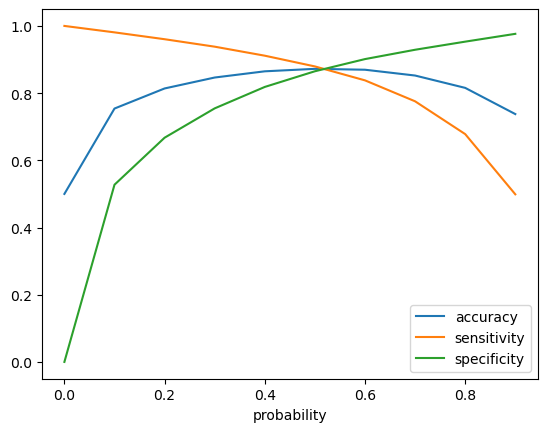

In [121]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.55

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At point 0.55` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

To achieve higher sensitivity we further reduce probability to 0.5 to achieve acuuracy,sensitivity and specificity as 0.87,0.88,0.86

In [122]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.002464,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.660767,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.012412,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.047577,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000216,4,1,0,0,0,0,0,0,0,0,0,0


In [123]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[16598  2589]
 [ 2313 16874]]
Accuracy:- 0.8722572575181112
Sensitivity:- 0.8794496273518528
Specificity:- 0.8650648876843696


### ROC Curve

In [124]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

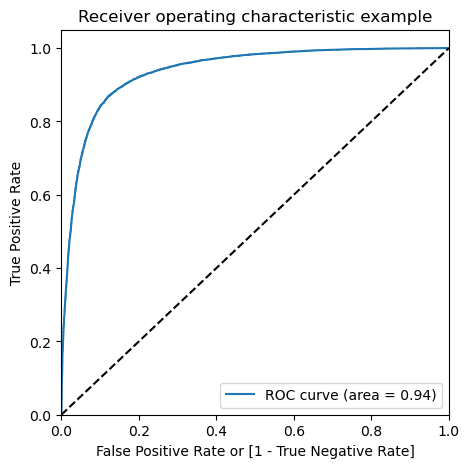

In [125]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

#### Area under curve is coming as 0.94,which tells us model is performing great

### Testing the model on the test set

In [126]:
X_test = X_test[new_cols]
X_test_sm = sm.add_constant(X_test)

In [127]:
y_test_pred = norm_log6.predict(X_test_sm)

In [128]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)


# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final[['CustID','churn','churn_prob']]


# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,39713,0,0.043701,0
1,80955,1,0.989205,1
2,80034,0,0.190135,0
3,93911,0,0.303063,0
4,55461,0,0.280936,0


### Performance on test set

In [129]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[7077 1154]
 [ 178  595]]
Accuracy:- 0.8520657485561972
Sensitivity:- 0.7697283311772316
Specificity:- 0.8597983234114931


***Model summary***

- Train set
    - Accuracy = 0.87
    - Sensitivity = 0.88
    - Specificity = 0.86
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.77
    - Specificity = 0.86
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

### Recomendations

#### Top 10 Predictors

In [130]:
intercepts=pd.DataFrame(norm_log6.params).reset_index()

In [131]:
intercepts.columns=['col_name','intercept']

In [132]:
intercepts['mod_value']=abs(intercepts.intercept)

In [133]:
intercepts=intercepts[intercepts['col_name']!='const']

In [134]:
intercepts.sort_values('mod_value',ascending=False).head(10)

,col_name,intercept,mod_value
12,total_ic_mou_8,-1.458389,1.458389
14,total_rech_num_8,-1.029408,1.029408
25,total_ic_mou_dec,-0.878329,0.878329
26,total_rech_num_dec,-0.835788,0.835788
19,monthly_2g_8,-0.760569,0.760569
18,monthly_2g_6,-0.760557,0.760557
17,vol_3g_mb_6,0.759600,0.759600
15,last_day_rch_amt_8,-0.716684,0.716684
6,isd_og_mou_8,0.710083,0.710083
21,monthly_3g_6,-0.603299,0.603299


We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming total calls has decreased in month of August
2. Target the customers, whose Number of recharges has decreased in month of august.
3. Also, the customers having lesser 2g usage in August and june are more likely to churn.
4. Also, the customer where last recharge amount has decreased in August

#### Plots of important predictors for churn and non churn customers

In [135]:
# Creating churn dataframe
data_churn = df[df['churn'] == 1]
# Creating not churn dataframe
data_non_churn = df[df['churn'] == 0]

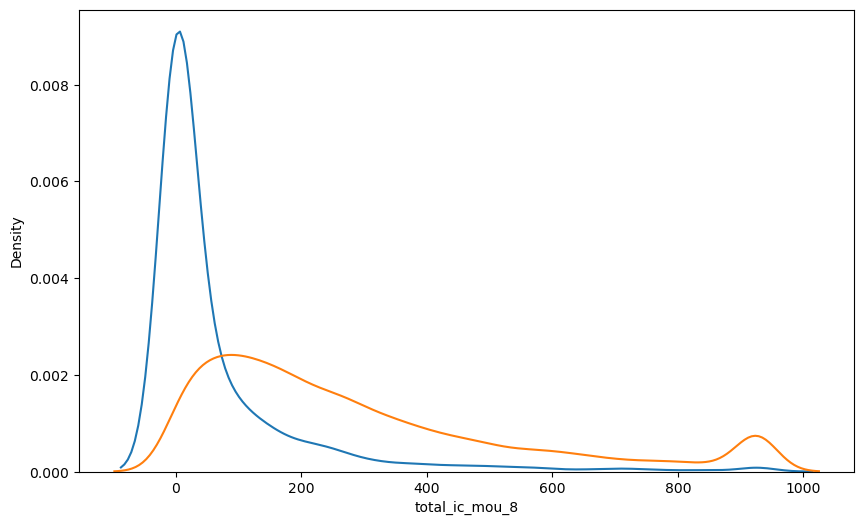

In [136]:

# Plotting total_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['total_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['total_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of ic for the month of August is mostly populated on the lower side than the non churn customers.

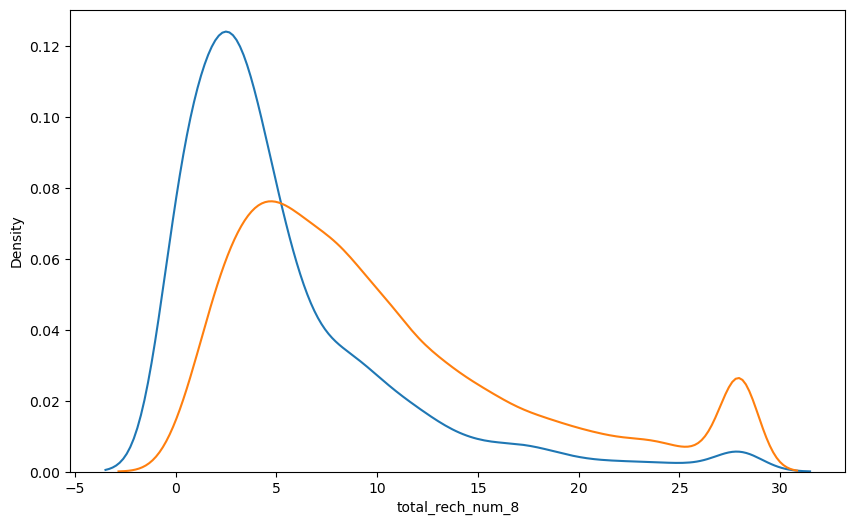

In [137]:
# Plotting total_rech_num_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['total_rech_num_8'],label='churn',hist=False)
sns.distplot(data_non_churn['total_rech_num_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers total number of recharges for the month of August is mostly populated on the lower side than the non churn customers.